In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00


In [2]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107718 sha256=be28210ee15ae4a6cee2451983e1aad088f8ceeca5052bc69a53957ef8a7158a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
# 데이터 로드
train = pd.read_csv("preprocessed_train.csv")
test = pd.read_csv('preprocessed_test.csv')

## 데이터 확인

In [7]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,Marital_Status,Car_Ownership,Has_Children,ProdTaken
0,0,50.00,Self Enquiry,2,15.00,Large Business,male,1,4.00,basic,3,5.00,1,4,executive,253905.00,unmarried,0,0,1
1,1,56.00,Company Invited,1,14.00,Salaried,male,1,4.00,standard,3,2.00,1,4,senior manager,404475.00,divorced,1,0,0
2,2,NaN,Self Enquiry,1,10.00,Large Business,female,1,3.00,basic,3,4.00,0,4,executive,278145.00,married,0,0,1
3,3,20.00,Self Enquiry,2,18.00,Small Business,female,1,3.00,standard,4,1.00,0,5,senior manager,326805.00,divorced,1,0,0
4,4,48.00,Company Invited,3,17.00,Small Business,female,1,3.00,basic,4,4.00,0,4,executive,258435.00,single,1,0,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3389 non-null   float64
 2   TypeofContact           3483 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   float64
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   int64  
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   int64  
 11  NumberOfTrips           3467 non-null   float64
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [9]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome,Car_Ownership,Has_Children,ProdTaken
count,3489.00,3389.00,3489.00,3368.00,3489.00,3456.00,3489.00,3467.00,3489.00,3489.00,3433.00,3489.00,3489.00,3489.00
mean,1744.00,37.98,1.70,14.34,2.39,7.77,3.44,3.19,0.10,2.51,355671.37,0.49,0.71,0.14
std,1007.33,10.67,0.67,6.95,0.73,39.50,0.60,1.73,0.30,1.12,75173.25,0.50,0.46,0.35
min,0.00,10.00,1.00,4.00,1.00,1.00,3.00,1.00,0.00,1.00,200000.00,0.00,0.00,0.00
25%,872.00,30.00,1.00,9.00,2.00,3.00,3.00,2.00,0.00,2.00,300000.00,0.00,0.00,0.00
50%,1744.00,38.00,2.00,13.00,2.00,4.00,3.00,3.00,0.00,2.00,343140.00,0.00,1.00,0.00
75%,2616.00,46.00,2.00,16.00,3.00,4.00,4.00,5.00,0.00,3.00,400000.00,1.00,1.00,0.00
max,3488.00,61.00,3.00,36.00,4.00,600.00,5.00,8.00,1.00,5.00,600000.00,1.00,1.00,1.00


In [10]:
test.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome,Car_Ownership,Has_Children
count,3489.00,3396.00,3489.00,3489.00,3489.00,3465.00,3489.00,3447.00,3489.00,3489.00,3440.00,3489.00,3489.00
mean,5233.00,37.76,1.68,14.04,2.41,6.85,3.43,3.22,0.10,2.50,356591.11,0.49,0.71
std,1007.33,10.73,0.67,7.52,0.74,34.89,0.60,1.74,0.29,1.15,77118.66,0.50,0.46
min,3489.00,10.00,1.00,0.00,1.00,1.00,3.00,1.00,0.00,1.00,200000.00,0.00,0.00
25%,4361.00,30.00,1.00,9.00,2.00,3.00,3.00,2.00,0.00,2.00,300000.00,0.00,0.00
50%,5233.00,37.00,2.00,13.00,2.00,4.00,3.00,3.00,0.00,2.00,340627.50,0.00,1.00
75%,6105.00,46.00,2.00,16.00,3.00,4.00,4.00,5.00,0.00,3.00,400000.00,1.00,1.00
max,6977.00,61.00,3.00,36.00,4.00,500.00,5.00,8.00,1.00,5.00,600000.00,1.00,1.00


결측치 확인

In [11]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i,col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col +=1
            print('결측치가 있는 칼럼은: %s입니다.'%col)
            print('해당 칼럼에 총 %s개의 결측치가 존재합니다. '%missing_values)
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다.')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 칼럼은: Age입니다.
해당 칼럼에 총 100개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: TypeofContact입니다.
해당 칼럼에 총 6개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: DurationOfPitch입니다.
해당 칼럼에 총 121개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfFollowups입니다.
해당 칼럼에 총 33개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfTrips입니다.
해당 칼럼에 총 22개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: MonthlyIncome입니다.
해당 칼럼에 총 56개의 결측치가 존재합니다. 


In [12]:
missing_col = check_missing_col(test)

결측치가 있는 칼럼은: Age입니다.
해당 칼럼에 총 93개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: TypeofContact입니다.
해당 칼럼에 총 12개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfFollowups입니다.
해당 칼럼에 총 24개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfTrips입니다.
해당 칼럼에 총 42개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: MonthlyIncome입니다.
해당 칼럼에 총 49개의 결측치가 존재합니다. 


## 인코딩

Gender 칼럼에서 'Fe Male'은 'Female'로 변경

MaritalStatus 칼럼의 Unmarried와 Single의 처리 방안에 대해서도 고민해보았지만,  
여행상품을 신청하는데에 있어 완전히 같은 의미라고는 판단하지 않아 따로 처리를 해주진 않음(실제로 처리를 해주지 않는 것이 더 나은 성능을 보이는 것으로 보임)

In [13]:
train['Gender'].replace({'Fe Male': 'Female'}, inplace=True)
test['Gender'].replace({'Fe Male': 'Female'}, inplace=True)

인코딩 과정에서 결측치를 유지하기 위해 칼럼을 나누어서 인코딩

In [14]:
# 결측치 없는 object칼럼
features = ['Occupation', 'ProductPitched', 'Marital_Status', 'Designation','Gender']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# train을 먼저 인코딩해서 transform을 시키면 이후 test 인코딩 할때 fit을 못하기 때문에 test를 먼저 인코딩 해줌
# train 먼저 인코딩 후 새로운 변수에 할당하는 방법도 있지만 굳이 싶어서 하지 않음

# 결측치 없는 object칼럼들 인코딩
for o_col in features:
    encoder = LabelEncoder()
    encoder.fit(train[o_col])
    test[o_col] = encoder.transform(test[o_col])

In [17]:
# 모든 문자형 변수에 대해 encoder를 적용
for o_col in features:
    encoder = LabelEncoder()
    encoder.fit(train[o_col])
    train[o_col] = encoder.transform(train[o_col])

In [18]:
# 결측치 있는 TypeofContact칼럼 결측치 제외하고 따로 인코딩
train['TypeofContact'][train['TypeofContact']=='Self Enquiry'] = 1
train['TypeofContact'][train['TypeofContact']=='Company Invited'] = 0

test['TypeofContact'][test['TypeofContact']=='Self Enquiry'] = 1
test['TypeofContact'][test['TypeofContact']=='Company Invited'] = 0

In [19]:
# 결측치 제외하고 숫자형으로 바꿔주기
train['TypeofContact'] = train['TypeofContact'].apply(pd.to_numeric, errors='coerce')
test['TypeofContact'] = test['TypeofContact'].apply(pd.to_numeric, errors='coerce')

In [20]:
missing_col = check_missing_col(train)

결측치가 있는 칼럼은: Age입니다.
해당 칼럼에 총 100개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: TypeofContact입니다.
해당 칼럼에 총 6개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: DurationOfPitch입니다.
해당 칼럼에 총 121개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfFollowups입니다.
해당 칼럼에 총 33개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfTrips입니다.
해당 칼럼에 총 22개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: MonthlyIncome입니다.
해당 칼럼에 총 56개의 결측치가 존재합니다. 


In [21]:
# 인코딩 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3389 non-null   float64
 2   TypeofContact           3483 non-null   float64
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   float64
 5   Occupation              3489 non-null   int64  
 6   Gender                  3489 non-null   int64  
 7   NumberOfPersonVisiting  3489 non-null   int64  
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   int64  
 10  PreferredPropertyStar   3489 non-null   int64  
 11  NumberOfTrips           3467 non-null   float64
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

## 스케일링

최종적으로 tree기반의 catboost를 사용하기 때문에 스케일링의 영향은 거의 없을 것이라 생각함  
하지만 결측치를 채우는 과정에서 거리기반 알고리즘 knn을 사용하기 때문에 스케일링이 필요하다고 판단함

In [22]:
# 로그변환
train['DurationOfPitch'] = np.log1p(train['DurationOfPitch'])
test['DurationOfPitch'] = np.log1p(test['DurationOfPitch'])

train['MonthlyIncome'] = np.log1p(train['MonthlyIncome'])
test['MonthlyIncome'] = np.log1p(test['MonthlyIncome'])

In [23]:
# 변환된 값 확인
train.describe()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,Marital_Status,Car_Ownership,Has_Children,ProdTaken
count,3489.00,3389.00,3483.00,3489.00,3368.00,3489.00,3489.00,3489.00,3456.00,3489.00,3489.00,3467.00,3489.00,3489.00,3489.00,3433.00,3489.00,3489.00,3489.00,3489.00
mean,1744.00,37.98,0.63,1.70,2.64,1.39,0.59,2.39,7.77,1.46,3.44,3.19,0.10,2.51,1.67,12.76,1.27,0.49,0.71,0.14
std,1007.33,10.67,0.48,0.67,0.41,0.67,0.49,0.73,39.50,1.39,0.60,1.73,0.30,1.12,0.98,0.20,1.02,0.50,0.46,0.35
min,0.00,10.00,0.00,1.00,1.61,0.00,0.00,1.00,1.00,0.00,3.00,1.00,0.00,1.00,0.00,12.21,0.00,0.00,0.00,0.00
25%,872.00,30.00,0.00,1.00,2.30,1.00,0.00,2.00,3.00,0.00,3.00,2.00,0.00,2.00,1.00,12.61,0.00,0.00,0.00,0.00
50%,1744.00,38.00,1.00,2.00,2.64,1.00,1.00,2.00,4.00,1.00,3.00,3.00,0.00,2.00,2.00,12.75,1.00,0.00,1.00,0.00
75%,2616.00,46.00,1.00,2.00,2.83,2.00,1.00,3.00,4.00,3.00,4.00,5.00,0.00,3.00,2.00,12.90,2.00,1.00,1.00,0.00
max,3488.00,61.00,1.00,3.00,3.61,2.00,1.00,4.00,600.00,4.00,5.00,8.00,1.00,5.00,3.00,13.30,3.00,1.00,1.00,1.00


## 이상치 처리

MonthlyIncome칼럼은 추후 모델에 반영하지 않으므로 이상치 처리 안해줌

이상치를 처리할 때 IQR을 활용하였지만, boxplot기준으로 이상치로 분류된다 하더라도   
칼럼의 특성을 파악해 이상치로 판단되지 않으면 처리하지 않았음


In [24]:
# train과 test를 통합해 이상치 처리 해준 후 다시 분할
total_data = pd.concat([train,test])
total_data = total_data.reset_index()

In [25]:
import seaborn as sns
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Axes: ylabel='NumberOfFollowups'>

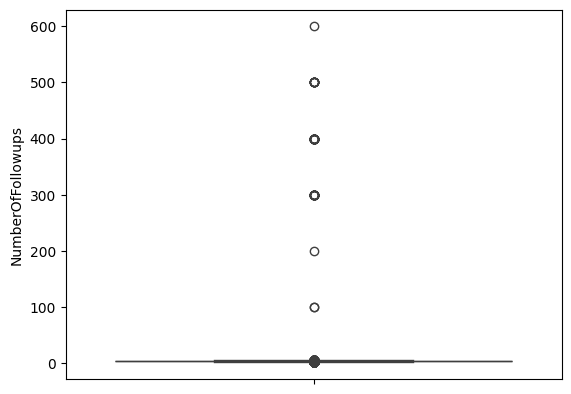

In [26]:
sns.boxplot(data=total_data['NumberOfFollowups'])

<Axes: ylabel='DurationOfPitch'>

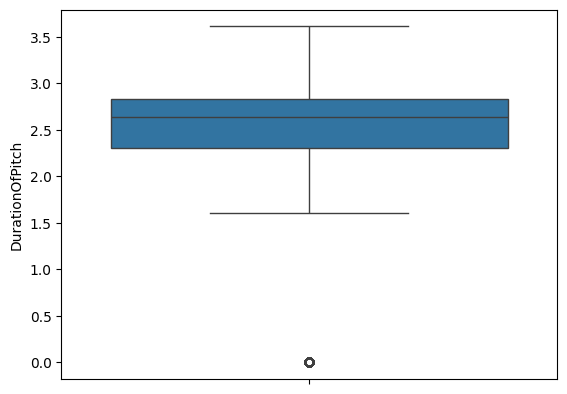

In [27]:
sns.boxplot(data=total_data['DurationOfPitch'])

<Axes: ylabel='NumberOfTrips'>

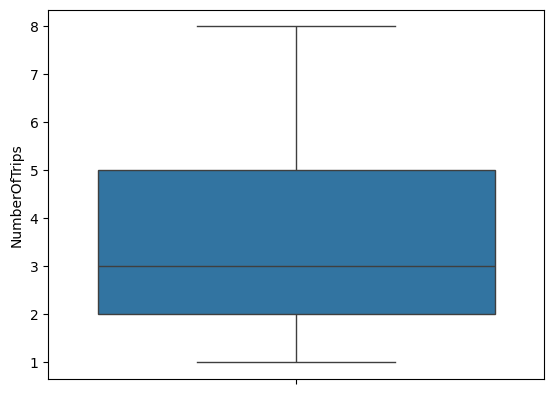

In [28]:
sns.boxplot(data=total_data['NumberOfTrips'])

In [29]:
# 이상치들 상한값, 하한값으로 대체
def outlier(df):
    IQR = df.quantile(0.75) - df.quantile(0.25)
    line_down = df.quantile(0.25) - IQR*1.5
    line_up = df.quantile(0.75) + IQR*1.5

    df = df.clip(line_down, line_up)

    return df

total_data['DurationOfPitch'] = outlier(total_data['DurationOfPitch'])
total_data['NumberOfTrips'] = outlier(total_data['NumberOfTrips'])

In [30]:
train = total_data[~total_data['ProdTaken'].isnull()]
test = total_data[total_data['ProdTaken'].isnull()]
test = test.drop('ProdTaken',axis=1)

In [31]:
train = train.drop(['index'],axis=1)
test = test.drop(['index'],axis=1)

## 결측치 처리

본 대회를 진행하면서 결측치를 채우는 방안에 대해 많은 고민을 하였다.   
각 칼럼마다의 특성을 파악해서 평균, 중앙값, 최빈값 등으로 채우는 방향으로 진행해보고  
여러 알고리즘을 활용해 채워보았지만, 결국 knn을 이용해 결측치를 채우는 방식이 가장 성능이 높게 나왔기에 채택하였다.


결측치를 충분한 근거를 가지고 처리하지 못한점이 아쉬움으로 남는다.  
(원래 완벽한 근거를 가지고 진행할 수는 없는가싶기도 하다..)

In [32]:
# 불필요한 id 칼럼 제거
train = train.drop(['id'],axis= 1)
test = test.drop(['id'],axis= 1)

In [33]:
test

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,Marital_Status,Car_Ownership,Has_Children
3489,48.00,1.00,2,2.64,2,1,1.00,4.00,4,3.00,7.00,0,3,0,13.12,3,0,0
3490,30.00,1.00,2,2.56,2,0,1.00,4.00,3,3.00,4.00,1,3,3,12.61,0,1,0
3491,25.00,1.00,1,2.30,1,0,1.00,4.00,0,3.00,1.00,0,3,1,12.47,1,0,0
3492,21.00,0.00,2,2.08,1,1,1.00,4.00,0,4.00,1.00,0,3,3,12.47,0,1,0
3493,41.00,0.00,1,2.08,1,1,1.00,4.00,0,3.00,1.00,0,4,1,12.50,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,41.00,0.00,1,2.71,2,0,1.00,3.00,0,3.00,2.00,0,4,1,12.48,0,1,0
6974,44.00,0.00,1,3.58,1,1,3.00,5.00,1,3.00,3.00,0,3,2,12.77,1,1,1
6975,24.00,1.00,2,3.09,2,1,2.00,3.00,0,3.00,2.00,0,3,1,12.51,2,1,1
6976,25.00,1.00,1,2.30,2,1,2.00,3.00,0,3.00,2.00,0,3,1,12.52,1,0,1


In [34]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed= imputer.fit_transform(train)
train = pd.DataFrame(imputed, columns=train.columns)

In [35]:
imputer = KNNImputer(n_neighbors=3)

test_copy = test.copy()
train_drop = train.drop('ProdTaken', axis=1)
imputer.fit(train_drop)   # 여기서도 data leakage에 조심하자
test = imputer.transform(test)

test = pd.DataFrame(test, columns=test_copy.columns)

In [36]:
missing_col = check_missing_col(train)
missing_col = check_missing_col(test)

결측치가 존재하지 않습니다.
결측치가 존재하지 않습니다.


## Age 범주 변환


Age 칼럼에 대해 범주화가 꼭 필요한가? 라는 질문에 대해서는 확실히 답하기 어렵다고 생각한다.  
하지만 범주화를 함으로써 과적합을 예방하고, 모델 해석측면에서 도움이 된다고 판단해 진행했다.

In [37]:
train['Age'].value_counts().sort_index()

Age
10.00     2
12.00     2
13.00     7
14.00    14
15.00    19
         ..
57.00    36
58.00    30
59.00    24
60.00    20
61.00     4
Name: count, Length: 92, dtype: int64

In [38]:
bins = list(range(15, 71, 10))
bins_label = [str(x)+"이상 "+str(x+10)+"미만" for x in bins]
train["Age_level"] = pd.cut(train["Age"], bins, right=False, labels=bins_label[:-1])

test["Age_level"] = pd.cut(test["Age"], bins, right=False, labels=bins_label[:-1])

In [39]:
train = train.drop(['Age'],axis= 1)
test = test.drop(['Age'],axis= 1)

In [40]:
train['Age_level'].value_counts().sort_index()

Age_level
15이상 25미만     368
25이상 35미만     989
35이상 45미만    1114
45이상 55미만     772
55이상 65미만     221
Name: count, dtype: int64

In [41]:
test['Age_level'].value_counts().sort_index()

Age_level
15이상 25미만     379
25이상 35미만    1044
35이상 45미만    1074
45이상 55미만     741
55이상 65미만     229
Name: count, dtype: int64

## Age_level 인코딩

범주화를 한 Age_level 칼럼에 대한 인코딩을 진행

In [42]:
encoder = LabelEncoder()
encoder.fit(train['Age_level'])
test['Age_level'] = encoder.transform(test['Age_level'])

In [43]:
encoder = LabelEncoder()
encoder.fit(train['Age_level'])
train['Age_level'] = encoder.transform(train['Age_level'])

## Feature Selection

In [44]:
# PermutationImportance 기반으로 중요도 낮다고 판단되는 칼럼 삭제
X = train.drop(['ProdTaken','MonthlyIncome','NumberOfPersonVisiting'],axis= 1)
y = train['ProdTaken']

test = test.drop(['MonthlyIncome','NumberOfPersonVisiting'],axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [45]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)


학습 데이터 레이블 값 비율
ProdTaken
0.00   85.45
1.00   14.55
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
ProdTaken
0.00   86.96
1.00   13.04
Name: count, dtype: float64


In [46]:
# 레이블이 불균형한 데이터임을 확인할 수 있음
train['ProdTaken'].value_counts(normalize = True)

ProdTaken
0.00   0.86
1.00   0.14
Name: proportion, dtype: float64

불균형 데이터 처리 방안에 대해 고민을 많이 하였다.   
SMOTE, ADASYN 등과 같은 오버샘플링 기법들을 사용해보았지만 성능을 향상시키지 못하였다.  
따라서 클래스별로 가중치를 다르게 부여하는 class_weight방법을 사용했다. (미미하지만 성능을 향상시킬 수 있었다)


## CatBoost

In [47]:
from sklearn.utils.class_weight import compute_class_weight

# 불균형한 클래스인 것으로 확인되어 class_weight = 'balanced'로 설정해준다.
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

In [48]:
from catboost import CatBoostClassifier

In [55]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb

# XGBoost 모델 생성
model = xgb.XGBClassifier(
    learning_rate=0.03,
    max_depth=10,
    n_estimators=1000,
    scale_pos_weight=class_weights[1],  # 클래스 가중치 설정
    subsample=0.8,
    colsample_bylevel=1.0,
    random_state=42,
    eval_metric='logloss'  # 평가 지표 설정
)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 500, 1000],  # 트리 개수
    'max_depth': [3, 5, 7, 10],         # 트리 깊이
    'learning_rate': [0.01, 0.1, 0.2]   # 학습률
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',  # 정확도를 기준으로 평가
                           cv=5,                # 5-겹 교차 검증
                           verbose=1,          # 진행 상황 출력
                           n_jobs=-1)          # 모든 CPU 코어 사용

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 5개
scores = cross_val_score(grid_search, X, y, scoring='accuracy', cv=5)

print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
교차 검증별 정확도: [0.8711 0.8539 0.8696 0.8754 0.8436]
평균 검증 정확도: 0.8627


In [56]:
# 교차 검증을 통해 AUC 계산
auc_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('교차 검증별 AUC:', np.round(auc_scores, 4))
print('평균 검증 AUC:', np.round(np.mean(auc_scores), 4))

KeyboardInterrupt: 

## 제출

In [60]:
model.fit(X, y)

pred = model.predict_proba(test)

In [64]:
# ID 값을 가져오기 (test_gd의 첫 번째 열이 ID라고 가정)
test=pd.read_csv('preprocessed_test.csv')
test_ids = test.iloc[:, 0]  # ID가 첫 번째 열에 있다고 가정

# 결과 데이터프레임 생성
results = pd.DataFrame({
    'ID': test_ids,
    'Prediction': pred[:, 1]
})

# 값만 포함된 CSV 파일로 저장 (속성값 없이)
results.to_csv('submission.csv', index=False, header=False)